# **Diamond Price Analysis using Random Forest Algorithm**
The Diamond Price Analysis project aims to explore and predict diamond prices using machine learning techniques. By analyzing the relationship between various attributes of diamonds, such as carat, cut, color, and clarity, You will develop a model to predict the price of diamonds accurately. This project highlights the importance of feature selection and regression techniques in pricing problems.

**Problem Statement**

**Objective:**
The goal of this project is to analyze the factors influencing diamond prices and build a machine learning model to predict the price based on its characteristics.

**Scenario:**
A jewelry business wants to automate the pricing process for diamonds to ensure consistent and competitive pricing. Using historical data on diamond features and prices, the business aims to build a predictive model that estimates prices accurately and provides insights into the factors affecting diamond valuation.

**Key Questions to Address:**
1.	What are the primary features that impact diamond pricing?
2.	How can we preprocess and visualize the data to uncover trends and relationships?
**Deliverables:**

•**Exploratory Data Analysis (EDA)**: Insights into data distribution, relationships between features, and their impact on pricing.

•**Data Preprocessing**: Addressing missing values, encoding categorical variables, and scaling features like carat.

• **Model Development**: Implement regression models (Use only Random Forest Algorithm) to predict diamond prices.

•	**Insights and Visualizations**: Highlight key factors influencing diamond pricing, supported by visualizations such as scatter plots and heatmaps.

This project will give you hands-on experience in handling regression problems while exploring the luxury goods market, making it an engaging and practical application of data science.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
data = pd.read_csv("/content/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [ ]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.7100

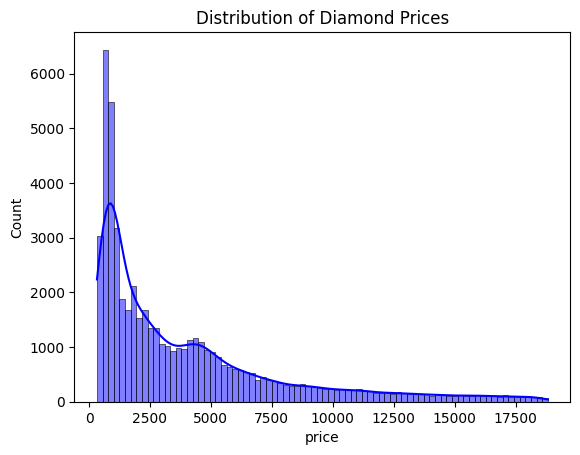

In [ ]:
sns.histplot(data['price'], kde=True, color='blue')
plt.title("Distribution of Diamond Prices")
plt.show()

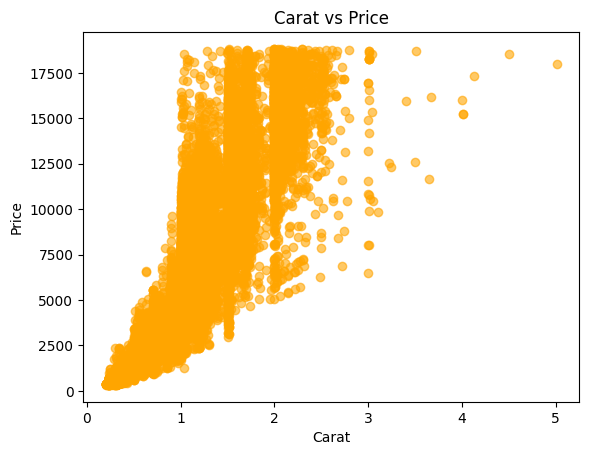

In [ ]:
plt.scatter(data['carat'], data['price'], alpha=0.6, color='orange')
plt.title("Carat vs Price")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

In [ ]:
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)

In [ ]:
X = data.drop(['price'], axis=1)
y = data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (43152, 24)
Testing Set Shape: (10788, 24)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importances)


Feature Importance:
          Feature    Importance
1           carat  5.963636e-01
0      Unnamed: 0  3.494004e-01
5               y  5.288658e-02
4               x  1.171355e-03
19    clarity_SI2  3.966556e-05
18    clarity_SI1  3.794234e-05
16        color_J  1.723614e-05
17     clarity_IF  1.721825e-05
15        color_I  1.376027e-05
21    clarity_VS2  1.335481e-05
6               z  1.022588e-05
14        color_H  6.289058e-06
2           depth  5.837946e-06
22   clarity_VVS1  5.726782e-06
20    clarity_VS1  2.197632e-06
3           table  2.079045e-06
23   clarity_VVS2  1.891484e-06
12        color_F  8.126854e-07
13        color_G  8.057398e-07
10  cut_Very Good  7.911036e-07
9     cut_Premium  7.232117e-07
8       cut_Ideal  6.623966e-07
11        color_E  6.148717e-07
7        cut_Good  1.987053e-07


<ipython-input-15-028b17f57c8c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


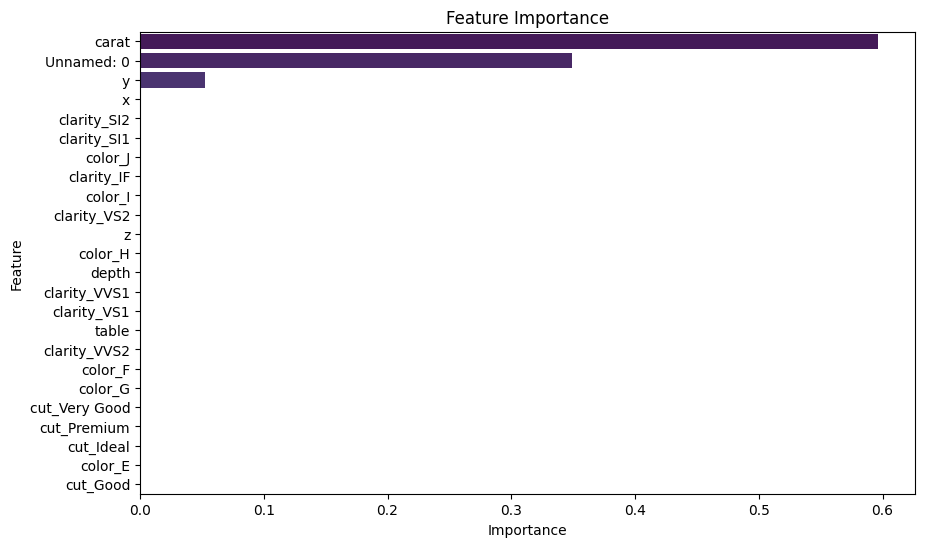

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance")
plt.show()

In [ ]:
y_pred = model.predict(X_test)

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


       Actual  Predicted
1388      559     556.90
50052    2201    2200.84
41645    1238    1238.00
42377    1304    1304.30
17244    6901    6899.09


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Root Mean Squared Error (RMSE): 21.84002149292996
R-squared (R²): 0.9999699948483239


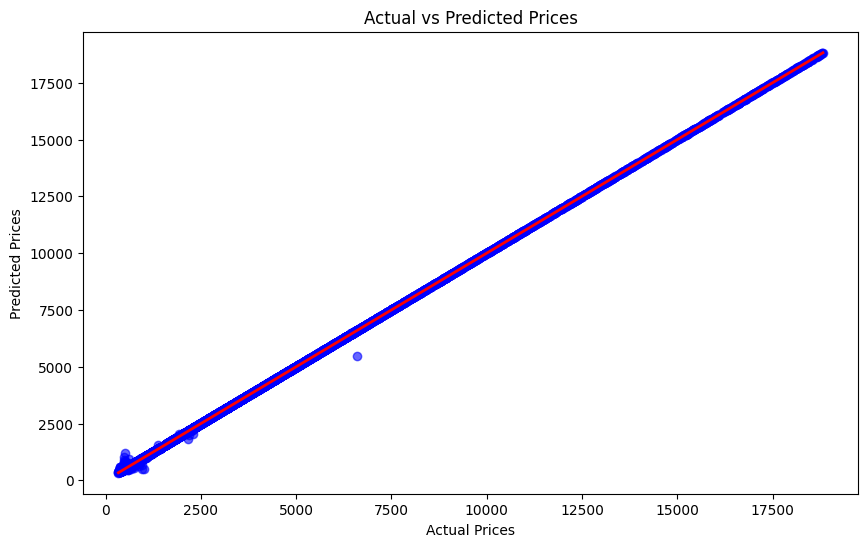

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()